In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [21]:
df = sns.load_dataset("tips")

In [22]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


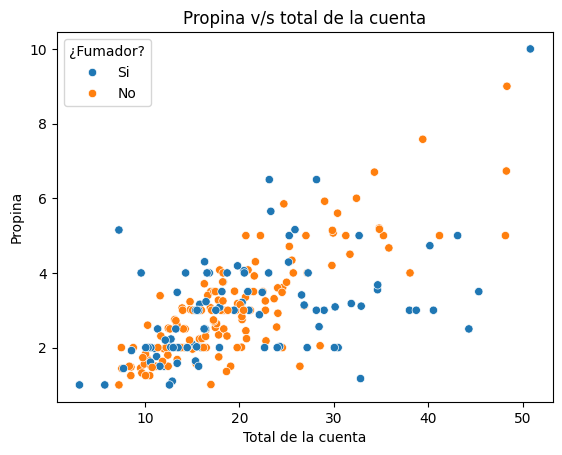

In [33]:
fig = sns.scatterplot(data = df, x = "total_bill", y = "tip", hue = "smoker")

handles, labels = fig.get_legend_handles_labels()
new_labels = ["Si", "No"]

fig.legend(handles, new_labels, title = "¿Fumador?")
fig.set_xlabel("Total de la cuenta")
fig.set_ylabel("Propina")
fig.set_title("Propina v/s total de la cuenta")
plt.show()

In [34]:
df["total_bill_quantils"] = pd.qcut(df["total_bill"], q = 3, labels = ["Cheap", "Medium", "Expensive"])

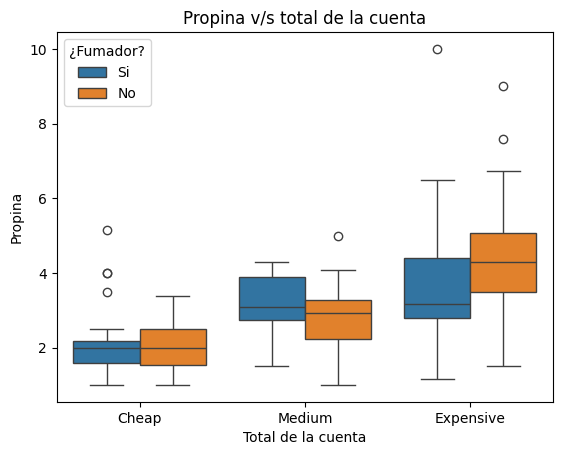

In [36]:
fig = sns.boxplot(data = df, x = "total_bill_quantils", y = "tip", hue = "smoker")

handles, labels = fig.get_legend_handles_labels()
new_labels = ["Si", "No"]

fig.legend(handles, new_labels, title = "¿Fumador?")
fig.set_xlabel("Total de la cuenta")
fig.set_ylabel("Propina")
fig.set_title("Propina v/s total de la cuenta")
plt.show()

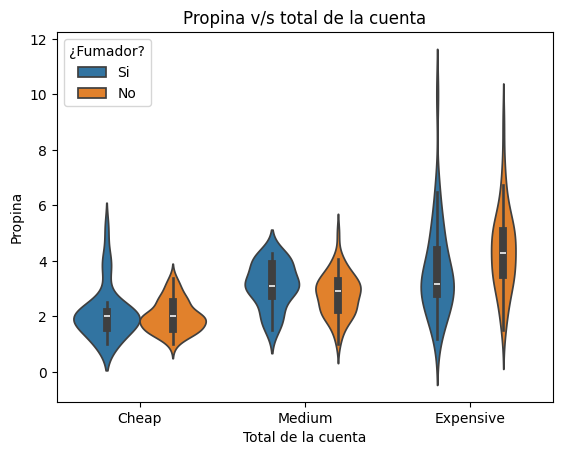

In [37]:
fig = sns.violinplot(data = df, x = "total_bill_quantils", y = "tip", hue = "smoker")

handles, labels = fig.get_legend_handles_labels()
new_labels = ["Si", "No"]

fig.legend(handles, new_labels, title = "¿Fumador?")
fig.set_xlabel("Total de la cuenta")
fig.set_ylabel("Propina")
fig.set_title("Propina v/s total de la cuenta")
plt.show()

In [39]:
df["total_bill"].min()

3.07

In [40]:
df["total_bill"].max()

50.81

In [44]:
df["new_quantils"] = pd.cut(df["total_bill"], bins = [3, 10, 17, 24, 31, 38, 45, 52])

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_quantils,new_quantils
0,16.99,1.01,Female,No,Sun,Dinner,2,Medium,"(10, 17]"
1,10.34,1.66,Male,No,Sun,Dinner,3,Cheap,"(10, 17]"
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium,"(17, 24]"
3,23.68,3.31,Male,No,Sun,Dinner,2,Expensive,"(17, 24]"
4,24.59,3.61,Female,No,Sun,Dinner,4,Expensive,"(24, 31]"


In [46]:
df["new_quantils2"] = pd.cut(df["total_bill"], bins = [3, 10, 17, 24, 31, 38, 45, 52], right = False)

In [47]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_quantils,new_quantils,new_quantils2
0,16.99,1.01,Female,No,Sun,Dinner,2,Medium,"(10, 17]","[10, 17)"
1,10.34,1.66,Male,No,Sun,Dinner,3,Cheap,"(10, 17]","[10, 17)"
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium,"(17, 24]","[17, 24)"
3,23.68,3.31,Male,No,Sun,Dinner,2,Expensive,"(17, 24]","[17, 24)"
4,24.59,3.61,Female,No,Sun,Dinner,4,Expensive,"(24, 31]","[24, 31)"


Text(0.5, 1.0, 'Proporción de rangos de cobro de cuentas')

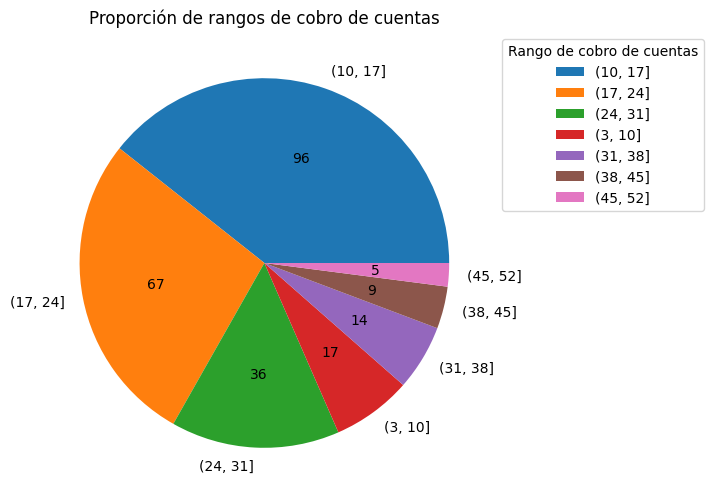

In [74]:
counting = df["new_quantils"].value_counts()
fig = plt.figure(figsize = (6, 6))
plot = fig.add_subplot()
pie_plot = plot.pie(counting, labels = counting.index, autopct = lambda x : "{:.0f}".format(x * (counting.sum() / 100)))
plot.legend(pie_plot[0], counting.index, title = "Rango de cobro de cuentas", bbox_to_anchor = (1, 1))
plot.set_title("Proporción de rangos de cobro de cuentas")

In [55]:
counting

new_quantils
(10, 17]    96
(17, 24]    67
(24, 31]    36
(3, 10]     17
(31, 38]    14
(38, 45]     9
(45, 52]     5
Name: count, dtype: int64

In [75]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_quantils,new_quantils,new_quantils2
0,16.99,1.01,Female,No,Sun,Dinner,2,Medium,"(10, 17]","[10, 17)"
1,10.34,1.66,Male,No,Sun,Dinner,3,Cheap,"(10, 17]","[10, 17)"
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium,"(17, 24]","[17, 24)"
3,23.68,3.31,Male,No,Sun,Dinner,2,Expensive,"(17, 24]","[17, 24)"
4,24.59,3.61,Female,No,Sun,Dinner,4,Expensive,"(24, 31]","[24, 31)"


In [80]:
columns = ["size", "total_bill", "tip"]

<Axes: >

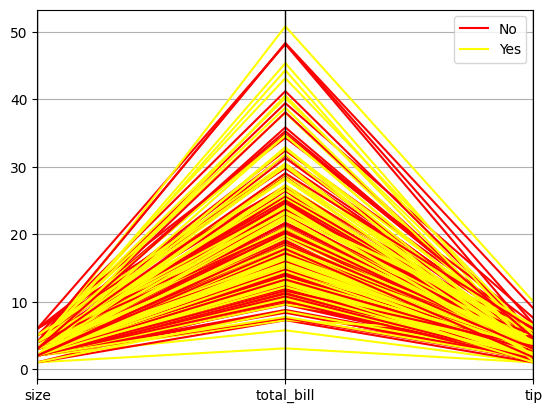

In [81]:
parallel_coordinates(df, "smoker", cols = columns, color = ["red", "yellow"])